In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib


# from analysis_plot_kit.core import fig_generator
from psPlotKit.data_plotter.fig_generator import figureGenerator

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_20624\3709177697.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import matplotlib.colors as mcolors
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=FED976-FFEDA0-D9F0A3-ADDD8E-78C679-41AB5D-238443-006837-004529-006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.996, 0.851, 0.463)),
    (0.063, (1.000, 0.929, 0.627)),
    (0.125, (0.851, 0.941, 0.639)),
    (0.188, (0.678, 0.867, 0.557)),
    (0.250, (0.471, 0.776, 0.475)),
    (0.313, (0.255, 0.671, 0.365)),
    (0.375, (0.137, 0.518, 0.263)),
    (0.438, (0.000, 0.408, 0.216)),
    (0.500, (0.000, 0.271, 0.161)),
    (0.563, (0.000, 0.408, 0.216)),
    (0.625, (0.137, 0.518, 0.263)),
    (0.688, (0.255, 0.671, 0.365)),
    (0.750, (0.471, 0.776, 0.475)),
    (0.813, (0.678, 0.867, 0.557)),
    (0.875, (0.851, 0.941, 0.639)),
    (0.938, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [3]:
# read in data
data_property_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea.csv')
data_property_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_nacl.csv')

data_property_reatoro_RO = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_RO_reaktoro.csv')
data_property_reatoro_MVC = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_MVC_reaktoro.csv')

In [4]:
# find errors and create dataframe
results_col = ["Osmotic Pressure", "Density"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()


for i in results_col:
    error_sea[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_seawater[i]) / data_property_reatoro_RO[i]) * 100
    error_nacl[i] = pd.DataFrame((data_property_reatoro_RO[i] - data_property_nacl[i]) / data_property_reatoro_RO[i]) * 100
    

results_col_2 = ["Enthalpy","Vap Pressure"]  

for i in results_col_2:
    if i == "Enthalpy":
        error_sea[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_seawater[i])) / abs(data_property_reatoro_MVC[i])) * 100
        error_nacl[i] = pd.DataFrame((abs(data_property_reatoro_MVC[i]) - (data_property_nacl[i])) / abs(data_property_reatoro_MVC[i])) * 100
        
    else:
        error_sea[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_seawater[i]) / data_property_reatoro_MVC[i]) * 100
        error_nacl[i] = pd.DataFrame(abs(data_property_reatoro_MVC[i] - data_property_nacl[i]) / data_property_reatoro_MVC[i]) * 100
       

col = ["Density","Osmotic Pressure", "Vap Pressure","Enthalpy",] 

In [5]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea_2D.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl_2D.csv')
data_MVC_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_reaktoro_2D.csv')

In [6]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Evaporator area" , "Compressor pressure ratio"] 
error_sea_MVC = pd.DataFrame()
error_nacl_MVC = pd.DataFrame()

for i in results_col:
    error_sea_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_seawater[i]) / data_MVC_reaktoro[i]) * 100
    error_nacl_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_nacl[i]) / data_MVC_reaktoro[i]) * 100

In [7]:
data_HPRO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_HPRO_sea.csv')
data_HPRO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_HPRO_nacl.csv')
data_HPRO_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_HPRO_reaktoro.csv')

In [8]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Membrane Area" , "Operating Pressure"] 
error_sea_HPRO = pd.DataFrame()
error_nacl_HPRO = pd.DataFrame()

for i in results_col:
    error_sea_HPRO[i] = pd.DataFrame((data_HPRO_reaktoro[i] - data_HPRO_seawater[i]) / data_HPRO_reaktoro[i]) * 100
    error_nacl_HPRO[i] = pd.DataFrame((data_HPRO_reaktoro[i] - data_HPRO_nacl[i]) / data_HPRO_reaktoro[i]) * 100

In [9]:
# xticks = ([3.361113e-02,4.838276e-02,9.373868e-02,1.366460e-01,1.775197e-01]) # actual input varied in parameter sweep
x_plot = data_property_reatoro_MVC["# Feed Mass Frac"]*1000 #np.repeat([35, 70.0, 100.0, 125, 150.0, 200.0, 250], 8) #kg/m3 Reaktoro @ 25 C
xticks = ([35, 70, 100, 125, 150, 200, 250])
yticks = np.linspace(
    min(data_property_nacl["Temperature"])- 273.15, max(data_property_nacl["Temperature"])- 273.15, 8
)
xticks = xticks
yticks = np.around(yticks, decimals=0)

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_20624\3873976031.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(56,)
[ 35.  70. 100. 125. 150. 200. 250.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 25.79482 35.0 25.0
[0] [1] 26.60537 35.0 35.0
[0] [2] 27.35522 35.0 45.0
[0] [3] 28.0488 35.0 55.0
[0] [4] 28.68911 35.0 65.0
[0] [5] 29.27808 35.0 75.0
[0] [6] 29.81675 35.0 85.0
[0] [7] 30.30542 35.0 95.0
[1] [0] 55.24833 70.0 25.0
[1] [1] 57.08554 70.0 35.0
[1] [2] 58.75473 70.0 45.0
[1] [3] 60.27092 70.0 55.0
[1] [4] 61.6448 70.0 65.0
[1] [5] 62.88362 70.0 75.0
[1] [6] 63.99194 70.0 85.0
[1] [7] 64.97211 70.0 95.0
[2] [0] 84.80744 100.0 25.0
[2] [1] 87.69959 100.0 35.0
[2] [2] 90.29613 100.0 45.0
[2] [3] 92.62607 100.0 55.0
[2] [4] 94.71024 100.0 65.0
[2] [5] 96.56306 100.0 75.0
[2] [6] 98.19383 100.0 85.0
[2] [7] 99.60783 100.0 95.0
[3] [0] 113.3264 125.0 25.0
[3] [1] 117.2088 125.0 35.0
[3] [2] 120.6652 125.0 45.0
[3] [3] 123.7397 125.0 55.0
[3] [4] 126.4642 125.0 65.0
[3] [5] 128.8607 125.0 75.0
[3] [6] 130.9435 125.0 85.0
[3] [7] 132.7209 125.0 95.0
[4] [0] 146.1388 150.0 25.0
[4] [1] 151.0893 

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_20624\3873976031.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(56,)
[ 35.  70. 100. 125. 150. 200. 250.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 99.56326 35.0 25.0
[0] [1] 139.6273 35.0 35.0
[0] [2] 179.789 35.0 45.0
[0] [3] 220.0408 35.0 55.0
[0] [4] 260.3899 35.0 65.0
[0] [5] 300.85990000000004 35.0 75.0
[0] [6] 341.4895 35.0 85.0
[0] [7] 382.3313 35.0 95.0
[1] [0] 94.76921 70.0 25.0
[1] [1] 133.20929999999998 70.0 35.0
[1] [2] 171.7571 70.0 45.0
[1] [3] 210.36829999999998 70.0 55.0
[1] [4] 249.027 70.0 65.0
[1] [5] 287.7389 70.0 75.0
[1] [6] 326.5268 70.0 85.0
[1] [7] 365.42659999999995 70.0 95.0
[2] [0] 90.80998 100.0 25.0
[2] [1] 127.9016 100.0 35.0
[2] [2] 165.11020000000002 100.0 45.0
[2] [3] 202.36260000000001 100.0 55.0
[2] [4] 239.6251 100.0 65.0
[2] [5] 276.8894 100.0 75.0
[2] [6] 314.16540000000003 100.0 85.0
[2] [7] 351.476 100.0 95.0
[3] [0] 87.62353999999999 125.0 25.0
[3] [1] 123.6227 125.0 35.0
[3] [2] 159.746 125.0 45.0
[3] [3] 195.898 125.0 55.0
[3] [4] 232.0313 125.0 65.0
[3] [5] 268.1267 125.0 75.0
[3] [6] 304.1843 125.0 85

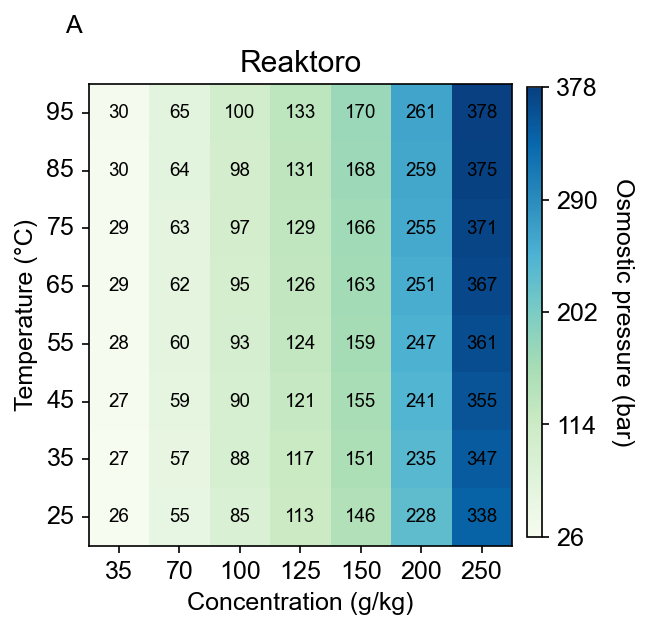

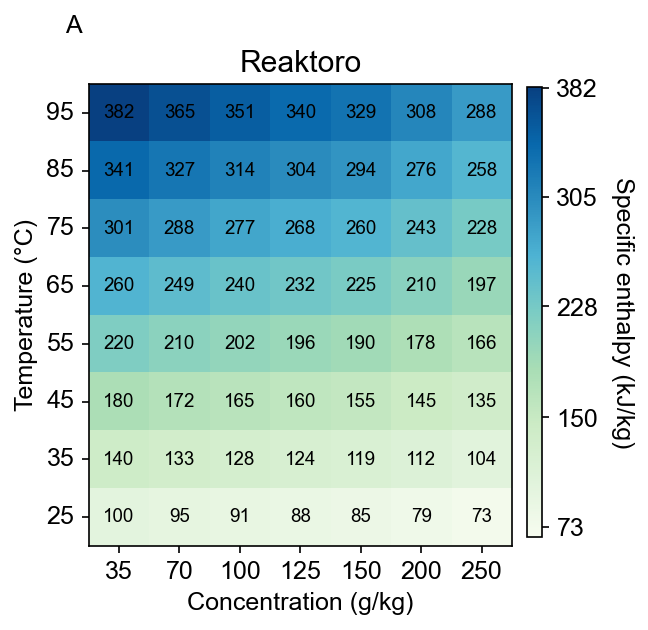

In [10]:
vmin = np.min(data_property_reatoro_RO["Osmotic Pressure"])/1e5
vmax = np.max(data_property_reatoro_RO["Osmotic Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()

figure.init_figure(width=4, height=4)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_RO["Temperature"] - 273.15,
    zdata=data_property_reatoro_RO["Osmotic Pressure"]/1e5,
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Osmostic pressure (bar)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_osm_p")

vmin = abs(np.min(data_property_reatoro_MVC["Enthalpy"]))/1000
vmax = abs(np.max(data_property_reatoro_MVC["Enthalpy"]))/1000
# vmin = abs(vmin-ref)
# vmax = abs(vmax-ref)

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure(width=4, height=4)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 8.5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro_MVC["Temperature"] - 273.15,
    zdata=abs(data_property_reatoro_MVC["Enthalpy"])/1000,
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Specific enthalpy (kJ/kg)")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Concentration (g/kg)",
    ylabel="Temperature (°C)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_enthalpy")

In [11]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "Osmotic Pressure", title = "prop_name", letter = "A", file_name="file"):
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i]), np.min(error_simple[i])])
    vmin = -10
    vmax = 10

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure(width=4, height=4)
    figure.set_default_figure_settings(font_size=12, label_size=12)
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    figure.add_text(-0.75, 8.5, letter)
    figure.set_title(title)
    figure.plot_map(
        xdata=x_plot,
        ydata=data["Temperature"] - 273.15,
        zdata=error_data[i],
        text=True,
        textfontsize= 9,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
    )
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Concentration (g/kg)",
        ylabel="Temperature (°C)",
        fontsize=12
    )
    figure.add_colorbar(zticks=zticks, zformat=1, zlabel= "% Difference")


    figure.save_fig(name=file_name)

(56,)
[ 35.  70. 100. 125. 150. 200. 250.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] -0.3406885568497861 35.0 25.0
[0] [1] -0.4017985842707694 35.0 35.0
[0] [2] -0.48063952693489576 35.0 45.0
[0] [3] -0.5551752659650324 35.0 55.0
[0] [4] -0.6118698000739654 35.0 65.0
[0] [5] -0.6430749557348023 35.0 75.0
[0] [6] -0.6456102693955579 35.0 85.0
[0] [7] -0.619559141566096 35.0 95.0
[1] [0] 0.09314308685891502 70.0 25.0
[1] [1] 0.11382917635534323 70.0 35.0
[1] [2] 0.06312683251203775 70.0 45.0
[1] [3] -0.021038338223474937 70.0 55.0
[1] [4] -0.11360244497508305 70.0 65.0
[1] [5] -0.19860497853018003 70.0 75.0
[1] [6] -0.2665804474751039 70.0 85.0
[1] [7] -0.31288809921672545 70.0 95.0
[2] [0] 0.04889901169048376 100.0 25.0
[2] [1] -0.0006499460259734395 100.0 35.0
[2] [2] -0.14175579839357458 100.0 45.0
[2] [3] -0.3264091848007802 100.0 55.0
[2] [4] -0.5223194450779557 100.0 65.0
[2] [5] -0.7082729151292431 100.0 75.0
[2] [6] -0.8709304851435167 100.0 85.0
[2] [7] -1.0027022976005 100.0 95

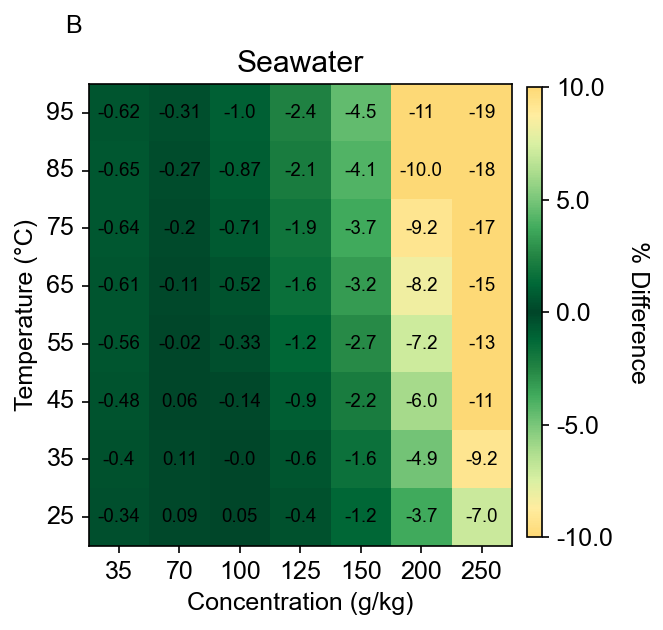

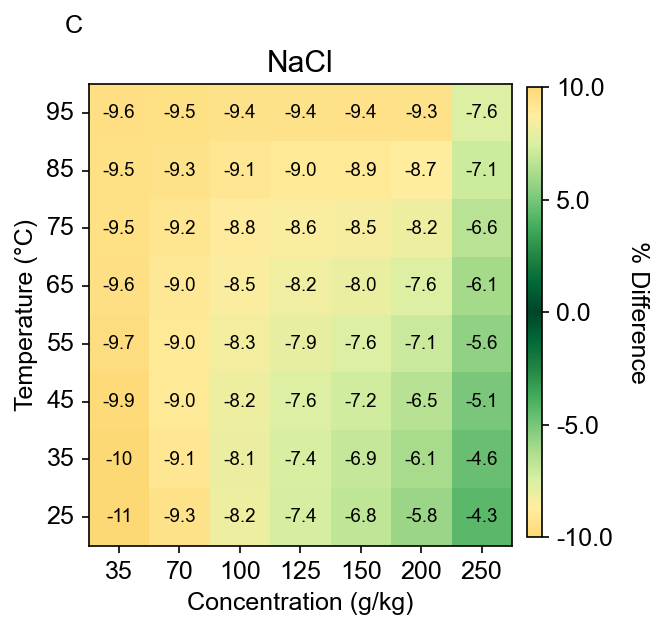

In [12]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Osmotic Pressure", "Seawater", "B", "plot_sea_Osm_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Osmotic Pressure", "NaCl", "C","plot_nacl_Osm_P")

(56,)
[ 35.  70. 100. 125. 150. 200. 250.] [25. 35. 45. 55. 65. 75. 85. 95.]
[0] [0] 0.6029834700068994 35.0 25.0
[0] [1] 1.0608956844399258 35.0 35.0
[0] [2] 1.4525360283443371 35.0 45.0
[0] [3] 1.819889765897961 35.0 55.0
[0] [4] 2.18457013885715 35.0 65.0
[0] [5] 2.561856864274712 35.0 75.0
[0] [6] 2.964044282474285 35.0 85.0
[0] [7] 3.4014217512403544 35.0 95.0
[1] [0] 2.0344793419719465 70.0 25.0
[1] [1] 2.558755282101164 70.0 35.0
[1] [2] 3.075214940168409 70.0 45.0
[1] [3] 3.5983083002524543 70.0 55.0
[1] [4] 4.144891919350108 70.0 65.0
[1] [5] 4.72998263356119 70.0 75.0
[1] [6] 5.366420152955283 70.0 85.0
[1] [7] 6.0646652433074015 70.0 95.0
[2] [0] 3.7991969605102907 100.0 25.0
[2] [1] 4.082904357725005 100.0 35.0
[2] [2] 4.551263338061492 100.0 45.0
[2] [3] 5.118781830239382 100.0 55.0
[2] [4] 5.7693037999775525 100.0 65.0
[2] [5] 6.504113194654621 100.0 75.0
[2] [6] 7.329323980298279 100.0 85.0
[2] [7] 8.25177252500882 100.0 95.0
[3] [0] 5.521975030910631 125.0 25.0
[3] [1] 

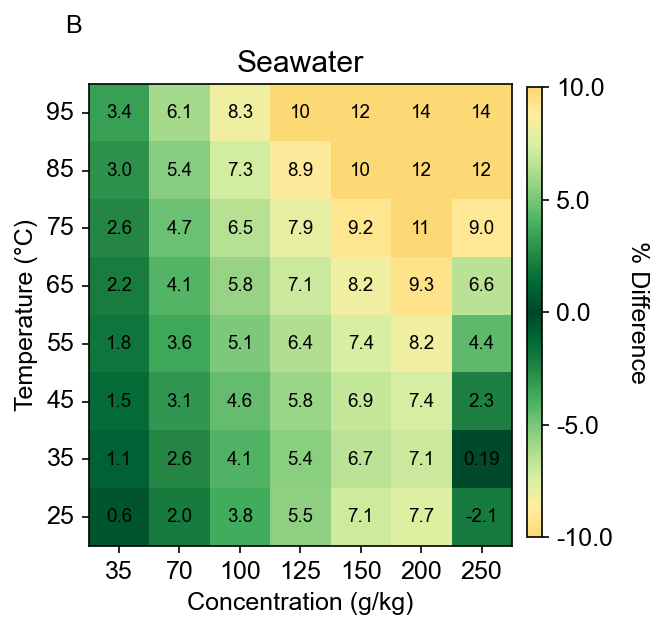

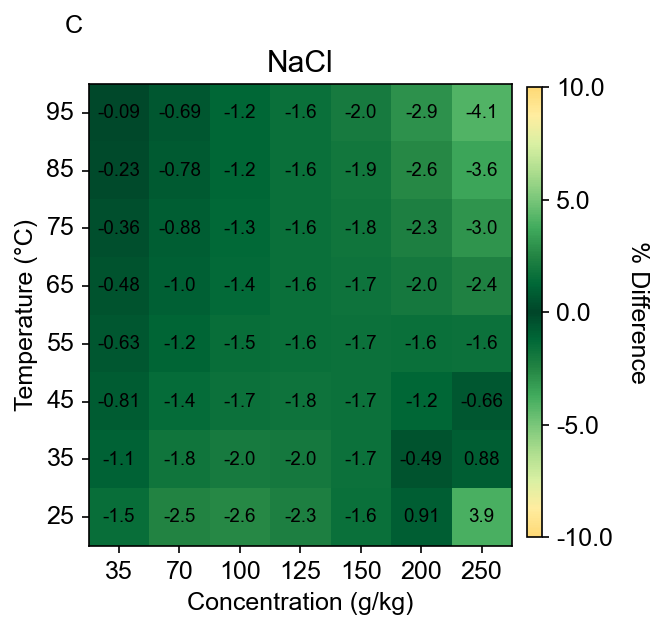

In [13]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 2, "Enthalpy", "Seawater", "B", "plot_sea_Enthalpy")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 2, "Enthalpy", "NaCl", "C","plot_nacl_Enthalpy")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_20624\2435275237.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 4.508306 70.0 40.0
[0] [1] 4.380526 70.0 50.0
[0] [2] 4.347964 70.0 60.0
[0] [3] 4.402411 70.0 70.0
[0] [4] 4.650269 70.0 80.0
[1] [0] 4.564807 100.0 40.0
[1] [1] 4.465735 100.0 50.0
[1] [2] 4.479009 100.0 60.0
[1] [3] 4.629825 100.0 70.0
[1] [4] 5.224363 100.0 80.0
[2] [0] 4.62693 125.0 40.0
[2] [1] 4.554725 125.0 50.0
[2] [2] 4.617935 125.0 60.0
[2] [3] 4.891365 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] 4.702901 150.0 40.0
[3] [1] 4.663185 150.0 50.0
[3] [2] 4.793005 150.0 60.0
[3] [3] 5.252833 150.0 70.0
[3] [4] nan 150.0 80.0
[[4.508306 4.564807 4.62693  4.702901]
 [4.380526 4.465735 4.554725 4.663185]
 [4.347964 4.479009 4.617935 4.793005]
 [4.402411 4.629825 4.891365 5.252833]
 [4.650269 5.224363      nan      nan]]
4.508306 4.8003985
4.564807 4.8003985
4.62693 4.8003985
4.702901 4.8003985
4.380526 4.8003985
4.465735 4.8003985
4.554725 4.8003985
4.663185 4.8003985
4.347964 4.8003985
4.479009 4.8003985
4.617935 4.8003985
4.

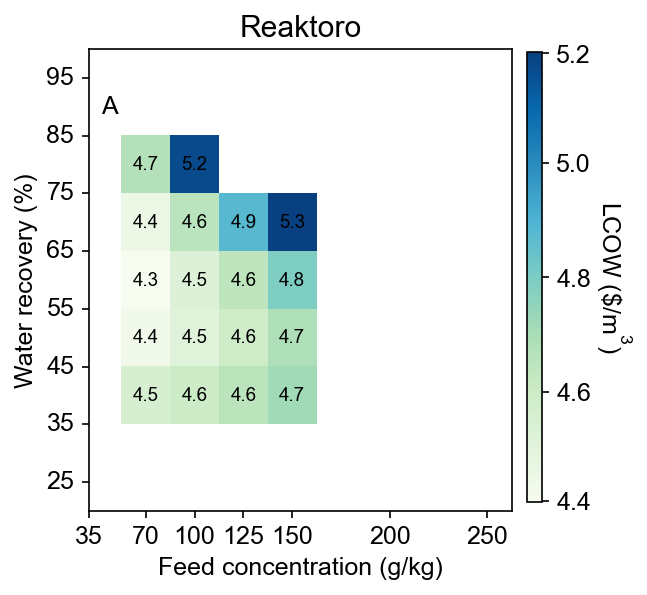

In [14]:

vmin = np.min(data_MVC_reaktoro["LCOW"])
vmax = np.max(data_MVC_reaktoro["LCOW"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure(width=4, height=4)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"] *1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["LCOW"],
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="LCOW ($\$$/m$^3$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_lcow_MVC")

In [15]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "LCOW", title = "prop_name", letter = "A", file_name="file"):
    vmin = -10
    vmax = 10

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure(width=4, height=4)
    figure.set_default_figure_settings(font_size=12, label_size=12)
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    figure.add_text(-0.75, 5, letter)
    figure.set_title(title)
    figure.plot_map(
        xdata=data["# Inlet Salinity"] *1000,
        ydata=data["Water Recovery"] *100,
        zdata=error_data[i],
        text=True,
        textfontsize= 9,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
        fix_nans=True,
    )
    figure.add_colorbar(zticks=zticks, zformat=0, zlabel= "% Difference", zlabelpad=20)
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Feed concentration (g/kg)",
        ylabel="Water recovery (%)",
        fontsize=12
    )
    # figure.add_text(-15,21,title)
    figure.save_fig(name=file_name)

(20,)
[ 70. 100. 125. 150.] [40. 50. 60. 70. 80.]
[0] [0] 0.4153222962238974 70.0 40.0
[0] [1] 0.08492130853690862 70.0 50.0
[0] [2] -0.575487745528709 70.0 60.0
[0] [3] -2.2416580369256747 70.0 70.0
[0] [4] -7.743423014883666 70.0 80.0
[1] [0] -0.34801033209071197 100.0 40.0
[1] [1] -1.3235223317102478 100.0 50.0
[1] [2] -3.1325009617082835 100.0 60.0
[1] [3] -7.51929068593304 100.0 70.0
[1] [4] -25.892515508589263 100.0 80.0
[2] [0] -1.7044346899564102 125.0 40.0
[2] [1] -3.8589376965678506 125.0 50.0
[2] [2] -7.7367481352595915 125.0 60.0
[2] [3] -19.23557125669418 125.0 70.0
[2] [4] nan 125.0 80.0
[3] [0] -3.843840216921431 150.0 40.0
[3] [1] -8.746983016972301 150.0 50.0
[3] [2] -15.955501819839538 150.0 60.0
[3] [3] nan 150.0 70.0
[3] [4] nan 150.0 80.0
[[  0.4153223   -0.34801033  -1.70443469  -3.84384022]
 [  0.08492131  -1.32352233  -3.8589377   -8.74698302]
 [ -0.57548775  -3.13250096  -7.73674814 -15.95550182]
 [ -2.24165804  -7.51929069 -19.23557126          nan]
 [ -7.7434

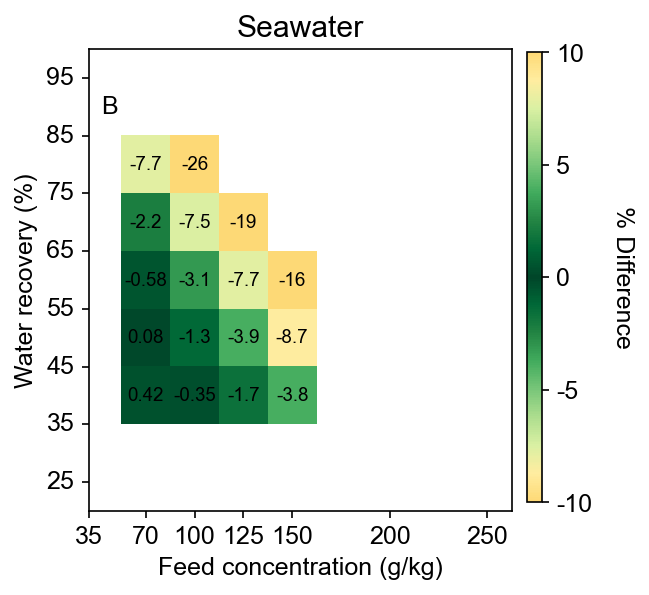

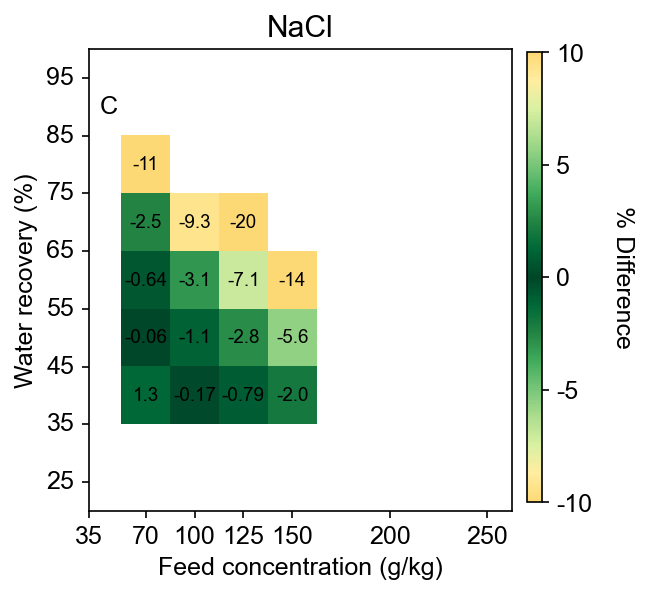

In [16]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 1, "LCOW", "Seawater","B","plot_sea_LCOW_MVC")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 1, "LCOW", "NaCl", "C", "plot_nacl_LCOW_MVC")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_20624\2675405636.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(20,)
[ 35.  50.  70. 100.] [30. 40. 50. 60. 70.]
[0] [0] 0.8761172 35.0 30.0
[0] [1] 0.745711 35.0 40.0
[0] [2] 0.6809725 35.0 50.0
[0] [3] 0.6649127 35.0 60.0
[0] [4] 0.7109479 35.0 70.0
[1] [0] 1.155837 50.0 30.0
[1] [1] 0.9899795 50.0 40.0
[1] [2] 0.9215028 50.0 50.0
[1] [3] 0.9327231 50.0 60.0
[1] [4] 1.06157 50.0 70.0
[2] [0] 1.64548 70.0 30.0
[2] [1] 1.422297 70.0 40.0
[2] [2] 1.355264 70.0 50.0
[2] [3] 1.426648 70.0 60.0
[2] [4] nan 70.0 70.0
[3] [0] 2.670637 100.0 30.0
[3] [1] 2.353813 100.0 40.0
[3] [2] 2.319962 100.0 50.0
[3] [3] nan 100.0 60.0
[3] [4] nan 100.0 70.0
[[0.8761172 1.155837  1.64548   2.670637 ]
 [0.745711  0.9899795 1.422297  2.353813 ]
 [0.6809725 0.9215028 1.355264  2.319962 ]
 [0.6649127 0.9327231 1.426648        nan]
 [0.7109479 1.06157         nan       nan]]
0.8761172 1.6677748500000003
1.155837 1.6677748500000003
1.64548 1.6677748500000003
2.670637 1.6677748500000003
0.745711 1.6677748500000003
0.9899795 1.6677748500000003
1.422297 1.6677748500000003
2.

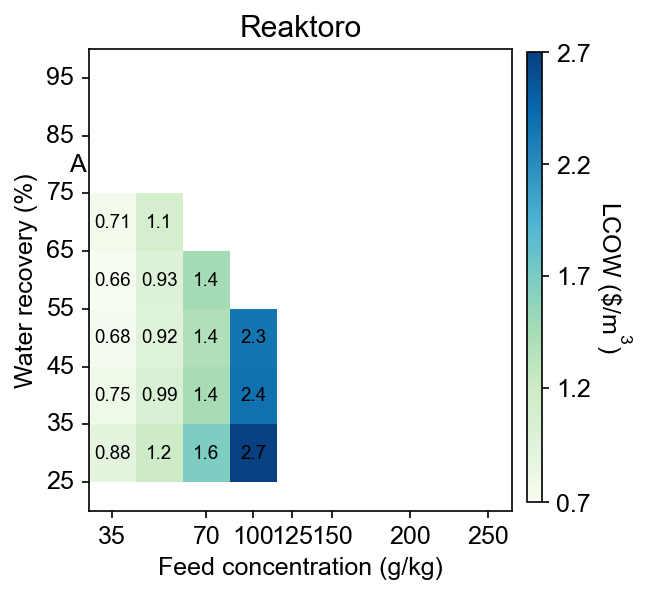

In [17]:
vmin = np.min(data_HPRO_reaktoro["LCOW"])
vmax = np.max(data_HPRO_reaktoro["LCOW"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure(width=4, height=4)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_HPRO_reaktoro["# Feed Mass Frac"] *1000,
    ydata=data_HPRO_reaktoro["Water Recovery"]*100,
    zdata=data_HPRO_reaktoro["LCOW"],
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="LCOW ($\$$/m$^3$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_lcow_hpro")

In [18]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "LCOW", title = "prop_name", letter = "A", file_name="file"):
    vmin = -10
    vmax = 10

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure(width=4, height=4)
    figure.set_default_figure_settings(font_size=12, label_size=12)
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    figure.add_text(-0.75, 5, letter)
    figure.set_title(title)
    figure.plot_map(
        xdata=data["# Feed Mass Frac"] *1000,
        ydata=data["Water Recovery"] *100,
        zdata=error_data[i],
        text=True,
        textfontsize= 9,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
        fix_nans=True,
    )
    figure.add_colorbar(zticks=zticks, zformat=1, zlabel= "% Difference", zlabelpad=20)
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Feed concentration (g/kg)",
        ylabel="Water recovery (%)",
        fontsize=12
    )
    # figure.add_text(-15,21,title)
    figure.save_fig(name=file_name)

(20,)
[ 35.  50.  70. 100.] [30. 40. 50. 60. 70.]
[0] [0] 0.6911404090685628 35.0 30.0
[0] [1] 0.7158000887743454 35.0 40.0
[0] [2] 0.7249778808982774 35.0 50.0
[0] [3] 0.7045436190345047 35.0 60.0
[0] [4] 0.5166342006214417 35.0 70.0
[1] [0] 0.7656788976300313 50.0 30.0
[1] [1] 0.8068247877860075 50.0 40.0
[1] [2] 0.7559173992743062 50.0 50.0
[1] [3] 0.5197255219689598 50.0 60.0
[1] [4] -0.27515849166801754 50.0 70.0
[2] [0] 0.6271118457835991 70.0 30.0
[2] [1] 0.5174727922508473 70.0 40.0
[2] [2] 0.16963484605213827 70.0 50.0
[2] [3] -0.6965978994117683 70.0 60.0
[2] [4] nan 70.0 70.0
[3] [0] -0.4393708317528623 100.0 30.0
[3] [1] -1.1370911792907807 100.0 40.0
[3] [2] -2.446893526704327 100.0 50.0
[3] [3] nan 100.0 60.0
[3] [4] nan 100.0 70.0
[[ 0.69114041  0.7656789   0.62711185 -0.43937083]
 [ 0.71580009  0.80682479  0.51747279 -1.13709118]
 [ 0.72497788  0.7559174   0.16963485 -2.44689353]
 [ 0.70454362  0.51972552 -0.6965979          nan]
 [ 0.5166342  -0.27515849         nan   

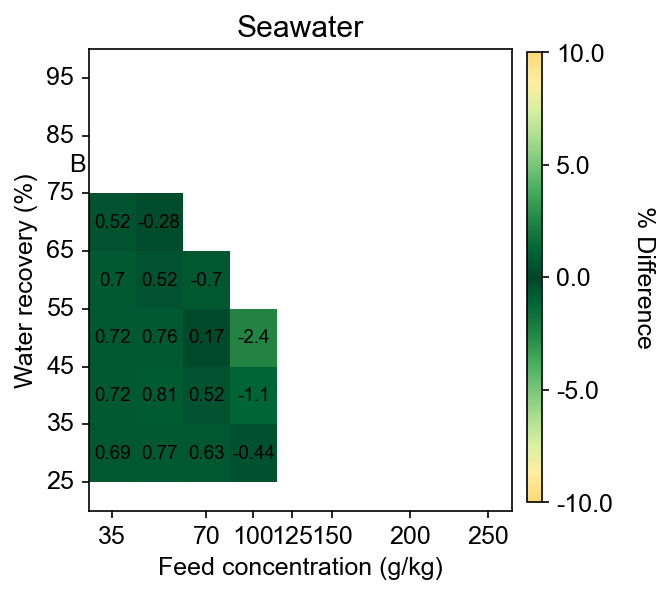

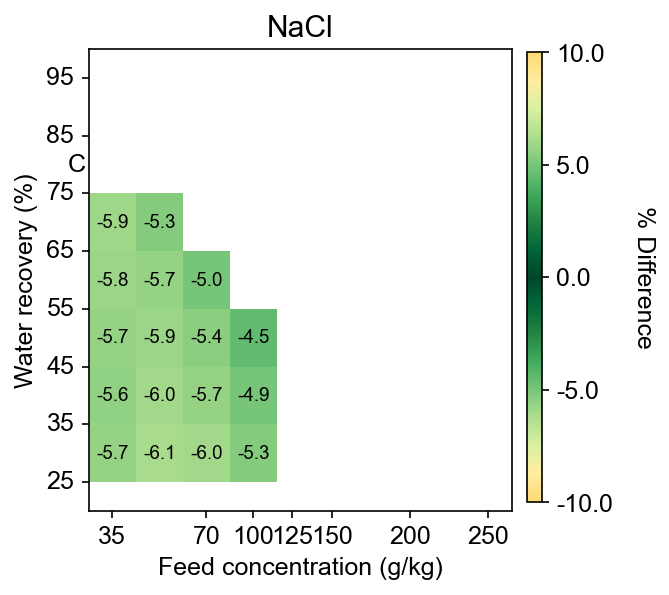

In [19]:
colormap_prop_error(data_HPRO_seawater, error_sea_HPRO, xticks, yticks, 1, "LCOW", "Seawater","B","plot_sea_LCOW_RO")
colormap_prop_error(data_HPRO_nacl, error_nacl_HPRO, xticks, yticks, 1, "LCOW", "NaCl", "C", "plot_nacl_LCOW_RO")